# Spatiotemporal Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

import datetime
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('spatiotemporal_data_with_census_preprocessed.csv')
data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)
display(data)

,start_station_latitude,start_station_longitude,date,trip_count,3,4,5,6,7,8,...,August,September,October,November,December,days_passed,housing_median_age,population,median_income,median_house_value
0,37.871719,-122.273068,2018-01-01,3,0,0,0,0,0,0,...,0,0,0,0,0,0,30.0,862.0,1.7778,268800.0
1,37.783757,-122.222603,2018-01-01,1,0,0,0,0,0,0,...,0,0,0,0,0,0,50.0,1525.0,1.4886,128800.0
2,37.757369,-122.392057,2018-01-01,9,0,0,0,0,0,0,...,0,0,0,0,0,0,52.0,410.0,4.0042,208300.0
3,37.337246,-121.883074,2018-01-01,1,0,0,0,0,0,0,...,0,0,0,0,0,0,40.0,1493.0,1.2887,212500.0
4,37.775880,-122.393170,2018-01-01,21,0,0,0,0,0,0,...,0,0,0,0,0,0,3.0,1441.0,4.7105,275000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148840,37.773793,-122.421239,2019-05-31,25,0,0,0,0,0,0,...,0,0,0,0,0,515,52.0,589.0,2.5186,250000.0
148841,37.773717,-122.411647,2019-05-31,27,0,0,0,0,0,0,...,0,0,0,0,0,515,52.0,168.0,3.2292,275000.0
148842,37.773507,-122.416040,2019-05-31,50,0,0,0,0,0,0,...,0,0,0,0,0,515,52.0,589.0,2.5186,250000.0
148843,37.777547,-122.433274,2019-05-31,25,0,0,0,0,0,0,...,0,0,0,0,0,515,10.0,1245.0,1.3062,220000.0


In [3]:
print(list(data.columns))

['start_station_latitude', 'start_station_longitude', 'date', 'trip_count', '3', '4', '5', '6', '7', '8', '9', '10', '11', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '33', '34', '35', '36', '37', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '58', '59', '60', '61', '62', '63', '64', '66', '67', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '95', '96', '97', '98', '99', '100', '101', '102', '104', '105', '106', '107', '108', '109', '110', '112', '113', '114', '115', '116', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '129', '130', '131', '132', '133', '134', '136', '137', '138', '139', '140', '141', '142', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '162', '163', '164', '16

In [4]:
data['datetime'] = data.apply(lambda x: datetime.datetime.strptime(x['date'], '%Y-%m-%d').date(), axis=1)

## Train/Test Split

In [5]:
data.drop(columns = ['date'], inplace = True)

train_data = data[data['datetime'] <= datetime.date(2019, 2, 28)]
test_data = data[data['datetime'] > datetime.date(2019, 2, 28)]

train_data.drop(columns = ['datetime'], inplace = True)
test_data.drop(columns = ['datetime'], inplace = True)

/home/joshuapjacob/.local/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
print(len(train_data))
print(len(test_data))

118915
29930


In [7]:
X_train = train_data.drop(columns=['trip_count'])
y_train = train_data['trip_count']

X_test = test_data.drop(columns=['trip_count'])
y_test = test_data['trip_count']

## Random Forest

In [8]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, verbose=2)
rf_model.fit(X_train, y_train)
print(rf_model.get_params())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.3min finished


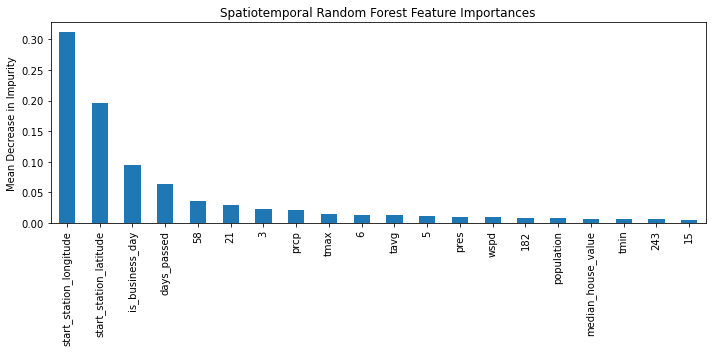

In [9]:
importances = rf_model.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns).nlargest(20)

fig, ax = plt.subplots(figsize=(10,5))
forest_importances.plot.bar(ax=ax)
ax.set_title("Spatiotemporal Random Forest Feature Importances")
ax.set_ylabel("Mean Decrease in Impurity")
fig.tight_layout()

## Evaluation

In [10]:
def OSR2(model, X_test, y_test, y_train):
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
    return (1 - SSE/SST)

In [11]:
print("Random Forest:")
print("\t R^2 =", rf_model.score(X_train, y_train))
print("\t OSR^2 =", OSR2(rf_model, X_test, y_test, y_train))

Random Forest:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.5s finished


	 R^2 = 0.9908260032390952


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


	 OSR^2 = 0.8440991292897039


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
